In [ ]:
# Given the analysis below, I would advise against creating a cryptocurrency investment portfolio. While there are three
# clear clusters, the vast majority of cryptocurrencies were in one cluster. The six differentiated points are
# insufficient to create a solid portfolio. 

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

crypto_df = pd.read_csv ('crypto_data.csv')

print(crypto_df)

     trd_code        CoinName Algorithm  IsTrading ProofType  TotalCoinsMined  \
0          42         42 Coin    Scrypt       True   PoW/PoS     4.199995e+01   
1         365         365Coin       X11       True   PoW/PoS              NaN   
2         404         404Coin    Scrypt       True   PoW/PoS     1.055185e+09   
3         611       SixEleven   SHA-256       True       PoW              NaN   
4         808             808   SHA-256       True   PoW/PoS     0.000000e+00   
...       ...             ...       ...        ...       ...              ...   
1247      XBC     BitcoinPlus    Scrypt       True       PoS     1.283270e+05   
1248     DVTC      DivotyCoin    Scrypt      False   PoW/PoS     2.149121e+07   
1249     GIOT     Giotto Coin    Scrypt      False   PoW/PoS              NaN   
1250     OPSC  OpenSourceCoin   SHA-256      False   PoW/PoS              NaN   
1251     PUNK       SteamPunk       PoS      False       PoS              NaN   

     TotalCoinSupply  
0   

In [2]:
#Data prep

crypto_df = crypto_df.dropna()
crypto_df = crypto_df.astype({'TotalCoinsMined': 'int', 'TotalCoinSupply': 'float64'})

crypto_df = crypto_df.loc[(crypto_df['IsTrading'] == True) & (crypto_df['TotalCoinsMined'] > 0)]

#added title to and deleted first column (which isn't mentioned in the homework) as well as coin name
crypto_df = crypto_df.drop(['CoinName', 'trd_code'], axis = 1) 

crypto_dfd = pd.get_dummies(crypto_df)

scaler = StandardScaler().fit(crypto_dfd)


print(crypto_dfd)

      IsTrading  TotalCoinsMined  TotalCoinSupply  \
0          True               41     4.200000e+01   
2          True       1055184902     5.320000e+08   
7          True         17927175     2.100000e+07   
8          True        107684222     0.000000e+00   
9          True         63039243     8.400000e+07   
...         ...              ...              ...   
1238       True       1999999995     2.000000e+09   
1242       True         14931046     2.500000e+08   
1245       True        980222595     1.400223e+09   
1246       True          7296537     2.100000e+07   
1247       True           128326     1.000000e+06   

      Algorithm_1GB AES Pattern Search  Algorithm_Argon2d  Algorithm_BLAKE256  \
0                                    0                  0                   0   
2                                    0                  0                   0   
7                                    0                  0                   0   
8                                    0 

In [3]:
# Applying PCA to reduce dimensions

# Initialize PCA model
pca = PCA(n_components= 2)

# Get three principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_dfd)

print(crypto_pca)

[[-2.19932863e+09 -1.52528801e+08]
 [-1.66693203e+09  9.02455988e+08]
 [-2.17832193e+09 -1.34609563e+08]
 [-2.19928819e+09 -4.48446275e+07]
 [-2.11530498e+09 -8.95211819e+07]
 [-2.17732528e+09 -1.43505819e+08]
 [-2.19932220e+09 -1.35327700e+08]
 [-1.98928607e+09 -3.92480934e+07]
 [-2.17832590e+09 -1.45153681e+08]
 [-2.17732819e+09 -1.51248251e+08]
 [-2.18682416e+09 -1.40538208e+08]
 [-2.17832650e+09 -1.46768427e+08]
 [-1.84931909e+09 -1.27117886e+08]
 [-2.17932448e+09 -1.41386627e+08]
 [-2.13532409e+09 -1.40347108e+08]
 [-2.18255327e+09 -1.34400048e+08]
 [-2.19908979e+09  4.82895013e+08]
 [-1.98694137e+08  1.53497342e+09]
 [ 3.81800644e+11 -2.96888050e+08]
 [-2.02946911e+09  1.76117029e+07]
 [-1.94928021e+09 -2.36818839e+07]
 [-2.09932591e+09 -1.45208642e+08]
 [-2.19928241e+09 -2.94660496e+07]
 [-1.95223111e+09  1.06935448e+08]
 [-2.11531005e+09 -1.03011839e+08]
 [-2.15115010e+09 -1.19103964e+08]
 [-2.19882865e+09 -1.52486451e+08]
 [-2.17832596e+09 -1.45316781e+08]
 [-2.19832828e+09 -1

In [4]:
#explained variance

pca.explained_variance_ratio_

array([9.99682288e-01, 3.17712078e-04])

In [5]:
crypto_pca_df = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2"]
)
crypto_pca_df.head()

,principal component 1,principal component 2
0,-2.199329e+09,-1.525288e+08
1,-1.666932e+09,9.024560e+08
2,-2.178322e+09,-1.346096e+08
3,-2.199288e+09,-4.484463e+07
4,-2.115305e+09,-8.952118e+07


C:\Users\Lunaclara\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


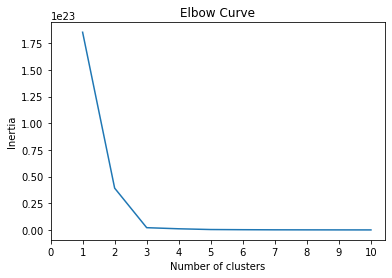

In [6]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(crypto_pca_df)

# Predict clusters
predictions = model.predict(crypto_pca_df)

# Add the predicted class column to the dataframe
crypto_pca_df['class'] = model.labels_


crypto_pca_df.head()

,principal component 1,principal component 2,class
0,-2.199329e+09,-1.525288e+08,0
1,-1.666932e+09,9.024560e+08,0
2,-2.178322e+09,-1.346096e+08,0
3,-2.199288e+09,-4.484463e+07,0
4,-2.115305e+09,-8.952118e+07,0


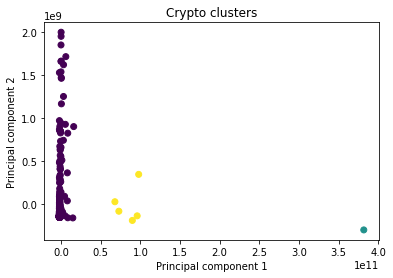

In [8]:
# Visualize the clusters
plt.scatter(x=crypto_pca_df['principal component 1'], y=crypto_pca_df['principal component 2'], c=crypto_pca_df['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Crypto clusters')
plt.show()